In [1]:
import stormpy
import stormpy.core

In [2]:
path = '../models/sensors.prism'
prism_program = stormpy.parse_prism_program(path)

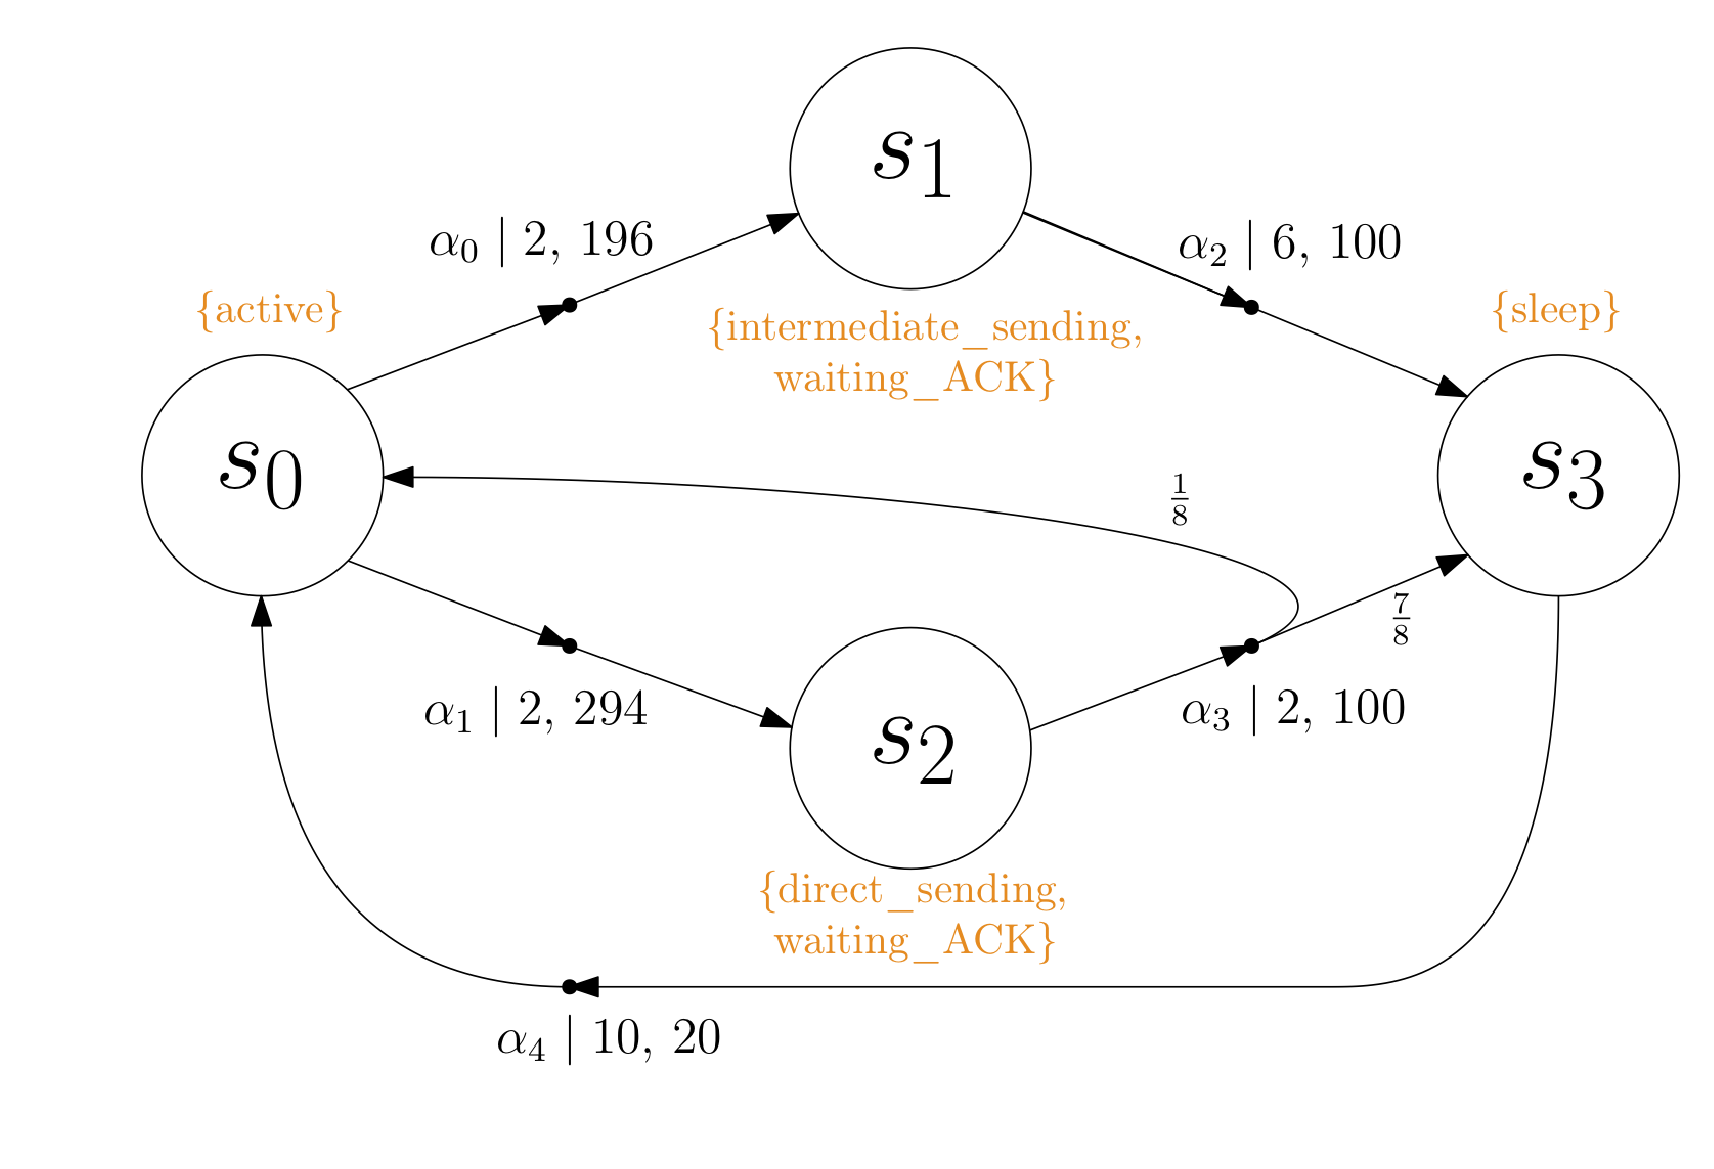

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure()

fig.set_dpi(300)

plt.imshow(mpimg.imread('../report/resources/mdmdp2-eps-converted-to.png'))
plt.axis('off')  # to hide tick values on X and Y axis

plt.tight_layout()
plt.show()

In [5]:
with open(path, 'r') as prism_file:
    print(prism_file.read())

mdp

module sensors_forwarding

s: [0..3] init 0;

[alpha0] s=0 -> 1 : (s'=1);
[alpha1] s=0 -> 1 : (s'=2);
[alpha2] s=1 -> 1 : (s'=3);
[alpha3] s=2 -> 0.125 : (s'=0) + 0.875 : (s'=3);
[alpha4] s=3 -> 1 : (s'=0);

endmodule

label "active" = s=0;
label "sleep" = s=3;
label "waiting" = s=1 | s=2;

rewards "time"
  [alpha0] true : 2;
  [alpha1] true : 2;
  [alpha2] true : 6;
  [alpha3] true : 2;
  [alpha4] true : 10;
endrewards

rewards "energy"
  [alpha0] true : 196;
  [alpha1] true : 294;
  [alpha2] true : 100;
  [alpha3] true : 100;
  [alpha4] true : 20;
endrewards



# SSP-WE

In [6]:
# Prism-PCTL formula
formula = "multi(R{\"time\"}min=? [F \"sleep\"], Pmax>=1 [F{\"time\"}<=12 \"sleep\"])"
properties = stormpy.parse_properties_for_prism_program(formula, prism_program)
model = stormpy.build_model(prism_program, properties)

In [7]:
print(model.labeling)
print("Model Type: {}".format(model.model_type))
print("Number of states: {}".format(model.nr_states))
print("Number of transitions: {}".format(model.nr_transitions))
print("Initial states : {}".format(model.initial_states))

3 labels
   * deadlock -> 0 item(s)
   * init -> 1 item(s)
   * sleep -> 1 item(s)

Model Type: ModelType.MDP
Number of states: 4
Number of transitions: 6
Initial states : [0]


In [8]:
initial_state = model.initial_states[0]
print(properties[0])

(1) : Obtain the values of the '0x7fa56bbe7ac8'-states with values described by 'multi(R[exp]{"time"}min=? [F "sleep"], Pmax>=1 [true Urew{"time"}<=12 "sleep"])'


In [9]:
initial_state = model.initial_states[0]
result = stormpy.model_checking(model, properties[0])

In [10]:
print(result)

None


In fact, stormpy does not currently allow to model-check multi-objective properties.

# SSP-PQ

In [11]:
formula = "multi(Pmax>=0.8 [F{\"time\"}<=4 \"sleep\"], Pmax>=0.9 [F{\"energy\"}<=700 \"sleep\"])"
properties = stormpy.parse_properties_for_prism_program(formula, prism_program)
model = stormpy.build_model(prism_program, properties)

In [12]:
initial_state = model.initial_states[0]
print(properties[0])
stormpy.model_checking(model, properties[0])

(1) : Obtain the values of the '0x7fa56bbe7188'-states with values described by 'multi(Pmax>=4/5 [true Urew{"time"}<=4 "sleep"], Pmax>=9/10 [true Urew{"energy"}<=700 "sleep"])'


In [13]:
initial_state = model.initial_states[0]
result = stormpy.model_checking(model, properties[0])
print("Result: {}".format(result.at(initial_state)))

AttributeError: 'NoneType' object has no attribute 'at'